<a href="https://colab.research.google.com/github/aozdl/K-means-Project/blob/main/K_means_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORT

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
import joblib

#LOADING DATASET

In [2]:
url = 'https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv'
housing_data = pd.read_csv(url)

In [3]:
housing_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
# Selecting only the required columns
housing_data = housing_data[['Latitude','Longitude', 'MedInc']]

In [5]:
# Split the dataset into training and test sets
train_set, test_set = train_test_split(housing_data, test_size=0.2, random_state=42)

# PCA

In [6]:
pca = PCA(n_components=2)

# Fit and transform the training data
train_data_pca = pca.fit_transform(train_set[['Latitude', 'Longitude', 'MedInc']])
test_data_pca = pca.transform(test_set[['Latitude', 'Longitude', 'MedInc']])

print(f'Explained variance ratio: {pca.explained_variance_ratio_}')

Explained variance ratio: [0.67726376 0.29796893]


In [7]:
#K-Means Clustering on PCA
kmeans_pca = KMeans(n_clusters=6, random_state=42)
train_set['cluster'] = kmeans_pca.fit_predict(train_data_pca)
test_set['cluster'] = kmeans_pca.predict(test_data_pca)

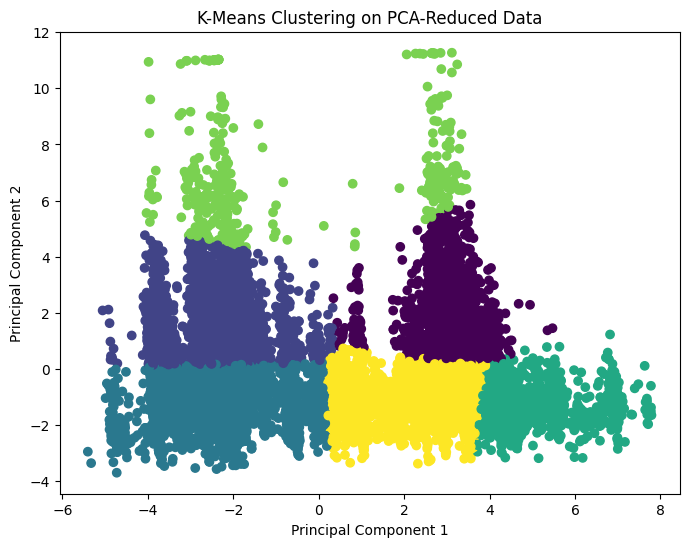

In [8]:
# Visualize K-Means Clusters on PCA-Reduced Data
plt.figure(figsize=(8, 6))
plt.scatter(train_data_pca[:, 0], train_data_pca[:, 1], c=train_set['cluster'], cmap='viridis')
plt.title('K-Means Clustering on PCA-Reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

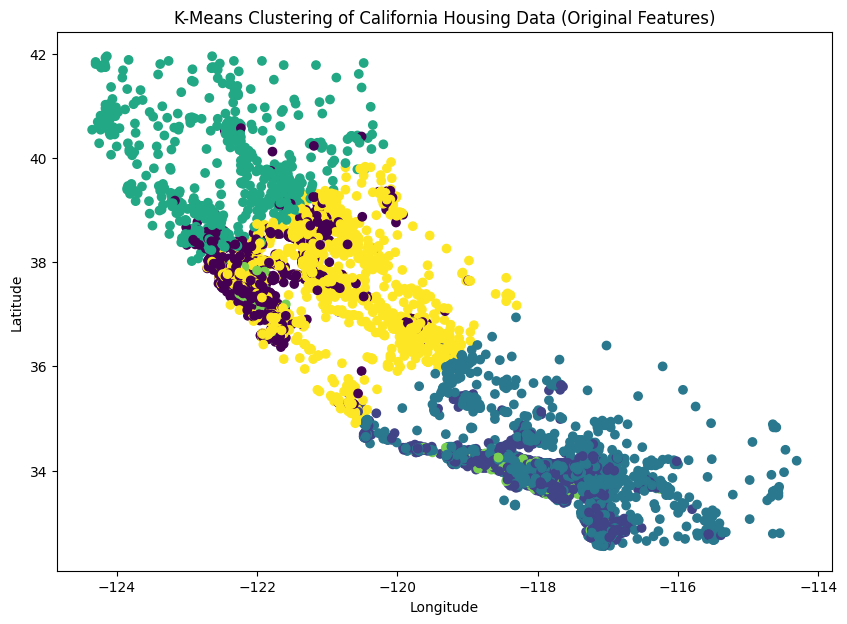

In [9]:
# Plot the clusters for the training set (original data)
plt.figure(figsize=(10, 7))
plt.scatter(train_set['Longitude'], train_set['Latitude'], c=train_set['cluster'], cmap='viridis', marker='o')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('K-Means Clustering of California Housing Data (Original Features)')
plt.show()

# HIERARCHIAL CLUSTERING ON PCA

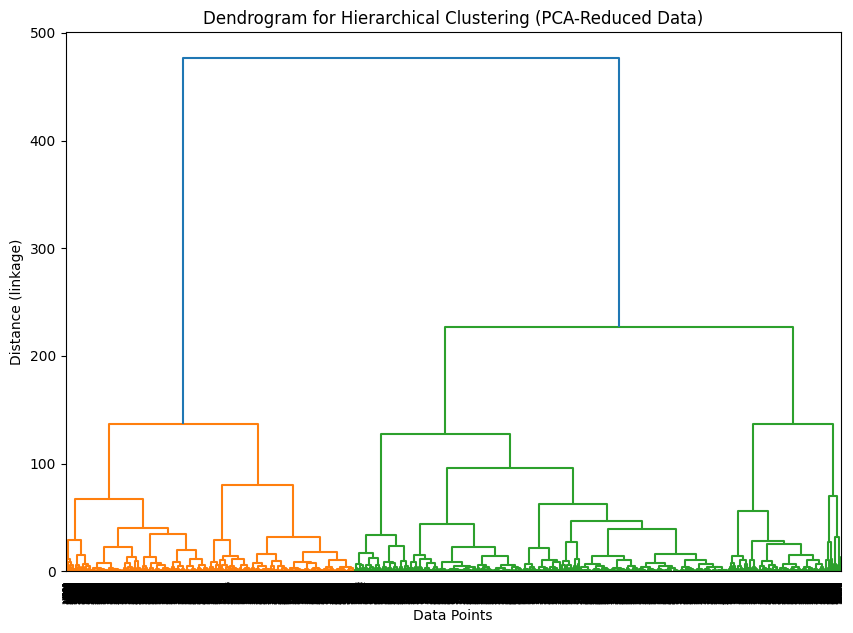

In [11]:
#Hierarchical Clustering on PCA-Reduced Data
Z_pca = linkage(train_data_pca, method='ward')

# Create a dendrogram for hierarchical clustering
plt.figure(figsize=(10, 7))
plt.title("Dendrogram for Hierarchical Clustering (PCA-Reduced Data)")
dendrogram(Z_pca)
plt.xlabel('Data Points')
plt.ylabel('Distance (linkage)')
plt.show()

Building a K-means Model



Supervided Classification Model

In [12]:
# Initialize the Decision Tree Classifier
classifier = DecisionTreeClassifier(random_state=42)

In [13]:
# Train the classifier on the training set
classifier.fit(train_set[['Latitude', 'Longitude', 'MedInc']], train_set['cluster'])

DecisionTreeClassifier(random_state=42)

In [14]:
test_predictions = classifier.predict(test_set[['Latitude', 'Longitude', 'MedInc']])

print("Accuracy:", accuracy_score(test_set['cluster'], test_predictions))
print(classification_report(test_set['cluster'], test_predictions))

Accuracy: 0.9917635658914729
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       557
           1       1.00      0.99      0.99       801
           2       0.99      1.00      1.00      1517
           3       0.98      0.97      0.97       229
           4       0.98      0.99      0.98        95
           5       0.99      0.99      0.99       929

    accuracy                           0.99      4128
   macro avg       0.99      0.99      0.99      4128
weighted avg       0.99      0.99      0.99      4128



Save the Model

In [18]:
joblib.dump(kmeans_pca, 'kmeans_model.pkl')

['kmeans_model.pkl']

In [16]:
joblib.dump(classifier, 'decision_tree_model.pkl')

['decision_tree_model.pkl']